# Results Visualization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib notebook

In [2]:
data = np.loadtxt('../datasets/main/results.txt', skiprows=0, delimiter='\t')

In [3]:
data_csv = pd.DataFrame(data, columns = ['filter', 'epoch', 'RMSE', 'MAE', 'Train_RMSE'])

In [4]:
data_csv

,filter,epoch,RMSE,MAE,Train_RMSE
0,0.0,0.0,0.888586,0.699544,0.872827
1,0.0,1.0,0.853711,0.670136,0.815561
2,0.0,2.0,0.839379,0.657760,0.786228
3,0.0,3.0,0.834584,0.651985,0.759468
4,0.0,4.0,0.831385,0.649066,0.744518
...,...,...,...,...,...
115,7.0,15.0,0.823074,0.642696,0.685921
116,7.0,16.0,0.823283,0.642382,0.685927
117,7.0,17.0,0.823301,0.642714,0.683211
118,7.0,18.0,0.823290,0.642549,0.682668


In [5]:
filters_ID = [0, 1, 2, 3, 4, 7]

In [6]:
filters = [data_csv[data_csv['filter'] == i]['RMSE'].tolist() for i in filters_ID]

In [7]:
def find_min_RMSE(temp_filter):
    min_RMSE = min(temp_filter)
    ind_RMSE = temp_filter.index(min_RMSE)
    
    return ind_RMSE, min_RMSE

In [8]:
epoch = list(range(20))

min_ind_RMSE = [find_min_RMSE(x) for x in filters]

sorted_min_ind_RMSE = sorted(min_ind_RMSE, key=lambda item: item[1], reverse=False)

<IPython.core.display.Javascript object>


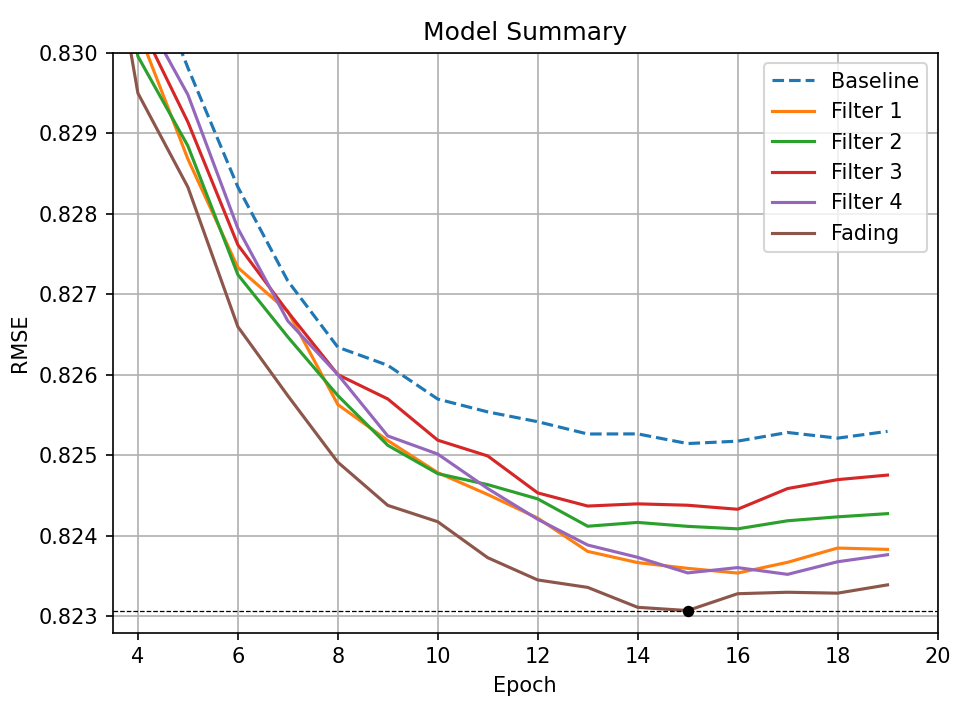

In [30]:
# Create a Figure with Axes
fig, ax = plt.subplots()

# Draw: Filters lines, Minima point, Horizontal line and Annotation
ax.plot(epoch, filters[0], linestyle='--', label='Baseline')
ax.plot(epoch, filters[1], label='Filter 1')
ax.plot(epoch, filters[2], label='Filter 2')
ax.plot(epoch, filters[3], label='Filter 3')
ax.plot(epoch, filters[4], label='Filter 4')
ax.plot(epoch, filters[5], label='Fading')

ax.scatter(sorted_min_ind_RMSE[0][0], sorted_min_ind_RMSE[0][1], s=20, color='k', zorder=2.5)
ax.axhline(y=sorted_min_ind_RMSE[0][1], color='k', linestyle='--', linewidth=0.6)

# Title and X, Y Labels
ax.set_xlabel('Epoch')
ax.set_ylabel('RMSE')
ax.set_title('Model Summary')

# Some additional functions
ax.grid()
ax.legend()
fig.tight_layout()
ax.axis([3.5, 20, 0.8228, 0.83])

# Save and show figure
fig.savefig('../datasets/images/final_results_final.pdf')
fig.show()

In [11]:
# x = 100 - ((new / base) * 100%) # on 1% accurate

In [12]:
# x = 100 - ((DF / F4) * 100)
# print(f'{x:0.2f} % RMSE less')